<a href="https://colab.research.google.com/github/EliasVillalvazo/master_deg_documents/blob/main/pytorch_tutorial/feedforward_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MNIST
# DataLoader and Transformation
# Multi layer NN and activation functions
# loss and optimizer
# training loop 
# model evaluation
# GPU Support


In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device configuration

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# hyperparameters definition
input_size = 28 * 28 # dimension of the images is 28x28, flattened is 784
hidden_size = 100
number_classes = 10 # digits from 0 to 9 in MNIST
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [8]:
# Load MNIST data
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=False)

# Get DataLoader
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [9]:
# Get a example
examples = iter(train_dataloader)
samples, labels = examples.next()
print(samples.shape, labels.shape)
# Remark: 100 corresponds to the batch size, 1 corresponds to only one color channel
# 28x28 es height and width of the image


torch.Size([100, 1, 28, 28]) torch.Size([100])


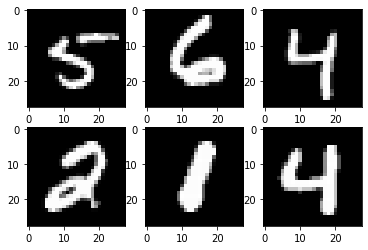

In [13]:
# Visualize examples
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [14]:
# Create Neural Network
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.layer2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.layer1(x)
    out = self.relu(out)
    out = self.layer2(out)
    return out

model = NeuralNet(input_size=input_size, hidden_size=hidden_size, num_classes=number_classes)

In [15]:
# create loss and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

In [17]:
# Do training loop now

# define number of total steps
n_total_steps = len(train_dataloader)

for epoch in range(num_epochs):
  # loop over the batches
  for i, (images, labels) in enumerate(train_dataloader):
    # reshape images first and send to device
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backward pass
    optimizer.zero_grad()
    # backprop
    loss.backward()
    # update parameters
    optimizer.step()

    if (i + 1) % 100 == 0:
      print(f'current epoch: {epoch+1} / {num_epochs}; current step: {i+1} / {n_total_steps}; loss = {loss.item():.4f}')

# test step
with torch.no_grad():
  n_correct_predictions = 0
  n_samples = 0
  for images, labels in test_dataloader:
    # reshape images first and send to device
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # calculate the predictions
    output_t = model(images)
    _, predictions = torch.max(output_t, 1) # returns value and index
    n_samples += labels.shape[0]
    n_correct_predictions += (predictions == labels).sum().item()

  acc = 100.0 * n_correct_predictions / n_samples
  print(acc)

current epoch: 1 / 2; current step: 100 / 600; loss = 0.2649
current epoch: 1 / 2; current step: 200 / 600; loss = 0.0777
current epoch: 1 / 2; current step: 300 / 600; loss = 0.1095
current epoch: 1 / 2; current step: 400 / 600; loss = 0.2351
current epoch: 1 / 2; current step: 500 / 600; loss = 0.1035
current epoch: 1 / 2; current step: 600 / 600; loss = 0.1536
current epoch: 2 / 2; current step: 100 / 600; loss = 0.0894
current epoch: 2 / 2; current step: 200 / 600; loss = 0.1071
current epoch: 2 / 2; current step: 300 / 600; loss = 0.1674
current epoch: 2 / 2; current step: 400 / 600; loss = 0.1226
current epoch: 2 / 2; current step: 500 / 600; loss = 0.0737
current epoch: 2 / 2; current step: 600 / 600; loss = 0.0657
96.79
